In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
plt.style.use('seaborn')

In [3]:
dfx = pd.read_csv("./xdata.csv")
dfy = pd.read_csv("./ydata.csv")

In [4]:
x = dfx.values
y = dfy.values

In [5]:
x = x[:,1:]

In [6]:
y = y[:,1:]

In [7]:
y = y.reshape((-1,))
print(x)

[[ 3.516279    3.71975047]
 [ 4.60649561  3.41437943]
 [ 4.67701056  3.04724443]
 [ 4.15772454  3.13867678]
 [ 3.15443087  3.61985805]
 [ 3.41751854  4.59164128]
 [ 1.61124605  3.39835595]
 [ 4.28808719  4.04396943]
 [ 3.19607968  4.95114323]
 [ 1.6258394   4.90239967]
 [ 2.82894521  3.91445026]
 [ 2.28966729  5.06896877]
 [ 2.89206152  3.66529487]
 [ 2.33634919  4.77256166]
 [ 3.67027475  3.79730296]
 [ 2.30717865  4.73262822]
 [ 3.15130599  3.43648588]
 [ 4.14502484  2.94851846]
 [ 2.17253471  3.6488889 ]
 [ 3.39390371  4.13447274]
 [ 1.59644351  4.43875703]
 [ 3.38348549  4.02119623]
 [ 5.08330979  4.03477733]
 [ 1.21644435  4.31174386]
 [ 4.15939179  2.54939222]
 [ 2.2392529   4.33673035]
 [ 2.99918423  5.63946256]
 [ 3.10384641  3.0156258 ]
 [ 2.47612428  4.12508079]
 [ 3.2447355   2.49239435]
 [ 2.03739207  5.03815425]
 [ 0.60211258  5.29511732]
 [ 4.96947578  3.37368252]
 [ 3.21264629  3.83263367]
 [ 4.37032895  4.13833792]
 [ 3.69323485  3.24528272]
 [ 3.09839038  3.35192483]
 

In [8]:
print(y)
print(x.shape)
print(y.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

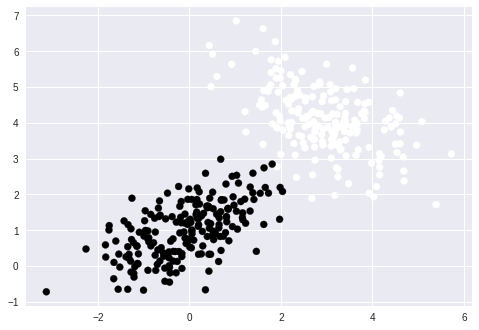

In [9]:
plt.scatter(x[:,0],x[:,1] , c = y)

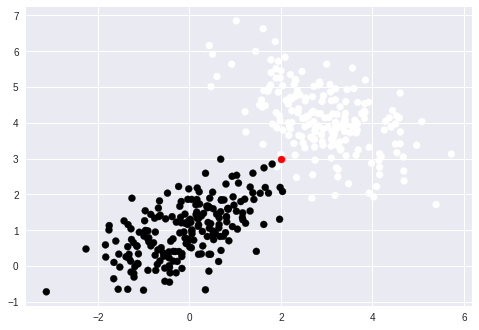

In [10]:
query_x = np.array([2,3])
plt.scatter(x[:,0],x[:,1],c=y)
plt.scatter(query_x[0],query_x[1],color='red')
plt.show()

In [11]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [12]:
def Knn(x,y,queryPoint,k = 5):
    m = x.shape[0]
    vals = []
    
    for i in range(m):
        d = dist(queryPoint,x[i])
        vals.append((d,y[i]))
    
    vals = sorted(vals)
    vals = vals[:k]
    
    vals = np.array(vals)
    
    new_vals = np.unique(vals[:,1] , return_counts = True)
    print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

In [13]:
p = Knn(x,y,query_x)

(array([0., 1.]), array([3, 2]))


In [14]:
p

0.0